In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [2]:
# import dataframe from data-analysis folder that has the label_encoded genres and year feature
df = pd.read_csv(r'/Users/adityamxr/Desktop/spotify-time-series/data-analysis/label_encoded_streams_df.csv')

In [3]:
# verify import
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cleaned_broad_genre,labelenc_genre
0,0.995,0.708,158648,0.1950,0,0.563,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928,unknown,500
1,0.994,0.379,282133,0.0135,0,0.901,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928,early music,138
2,0.604,0.749,104300,0.2200,0,0.000,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928,epicore,149
3,0.995,0.781,180760,0.1300,0,0.887,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928,tango,477
4,0.990,0.210,687733,0.2040,0,0.908,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928,classical,96


#### Remove cleaned_broad_genre, and all features except the top 4 features: Explicit, Acousticness, Loudness, Labelenc_genre

In [4]:
features_to_remove = ['danceability', 'duration_ms','energy', 'instrumentalness', 'liveness', 'mode','speechiness','tempo','valence','cleaned_broad_genre','popularity']

df = df.drop(columns=features_to_remove)
# set 'year' as the index since this will be the time modularity
df.set_index('year', inplace=True)
# verify df
df.head()

,acousticness,explicit,loudness,labelenc_genre
year,,,,
1928,0.995,0,-12.428,500
1928,0.994,0,-28.454,138
1928,0.604,0,-19.924,149
1928,0.995,0,-14.734,477
1928,0.990,0,-16.829,96


#### Plot the line graphs of each feature with year as the modularity

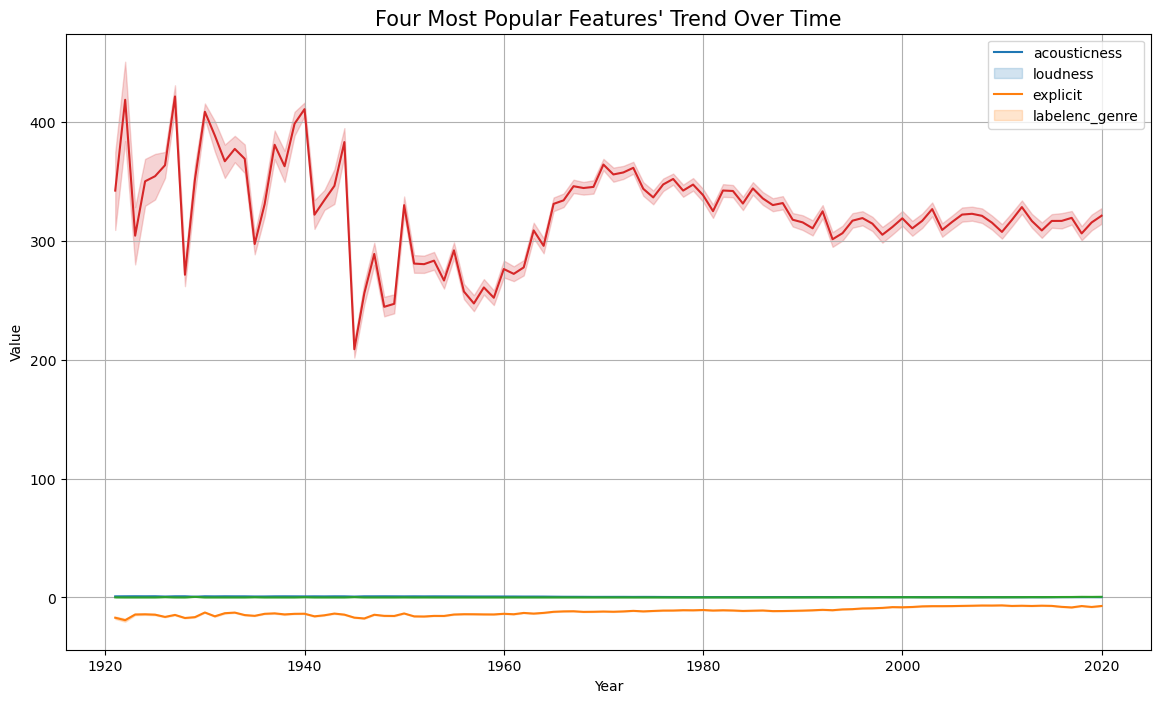

In [6]:
# create a simple line plot for initial analysis
plt.figure(figsize=(14,8))
plt.title("Four Most Popular Features' Trend Over Time", fontdict={"fontsize": 15})

# list of the four features you want to plot
features = ["acousticness", "loudness", "explicit", "labelenc_genre"]

# plot each feature as a line in the same plot
for feature in features:
    sns.lineplot(x='year', y=feature, data=df, label=feature)

# add labels and legend
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(features)
plt.grid(True)
plt.show()

### Clearly normalization of the numeric features is required

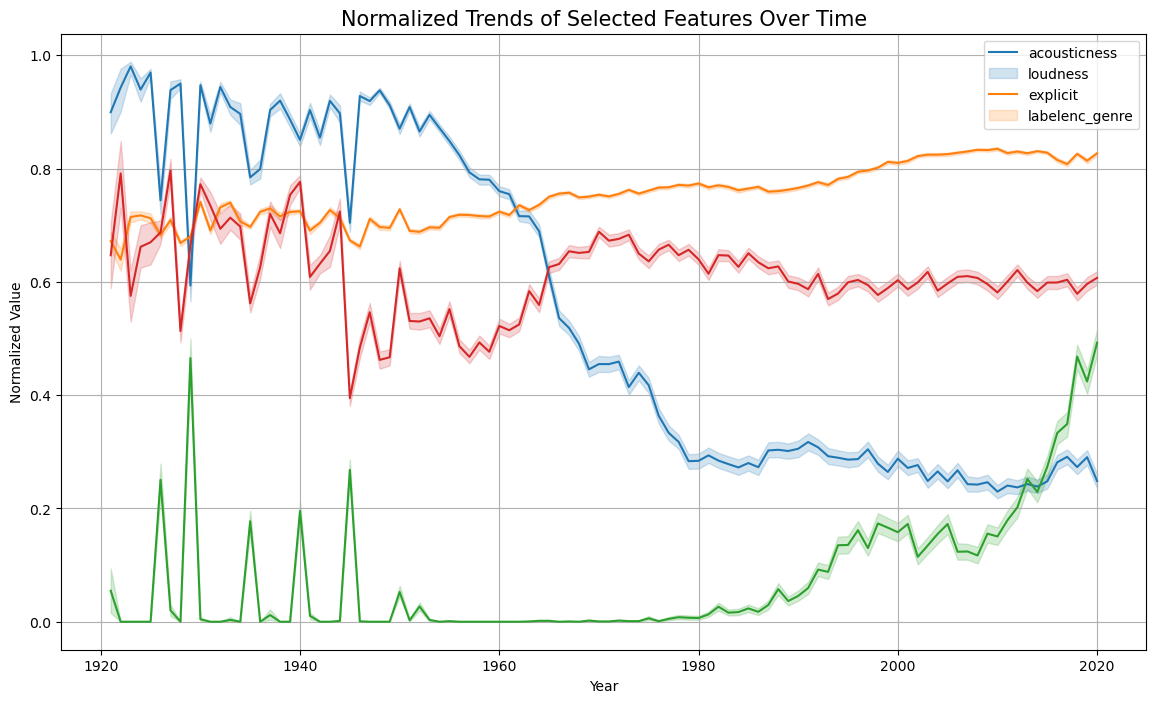

In [7]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler instance to scale features between 0 and 1
scaler = MinMaxScaler()

# list of the features to scale
features = ["acousticness", "loudness", "explicit", "labelenc_genre"]

# scale the selected features
df[features] = scaler.fit_transform(df[features])

# create a line plot again with normalized features
plt.figure(figsize=(14,8))
plt.title("Normalized Trends of Selected Features Over Time", fontdict={"fontsize": 15})

# plot each feature
for feature in features:
    sns.lineplot(x='year', y=feature, data=df, label=feature)

# add labels and legend
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.legend(features)
plt.grid(True)
plt.show()

### Normalization went smoothly, but the legend doesn't align with the line plots

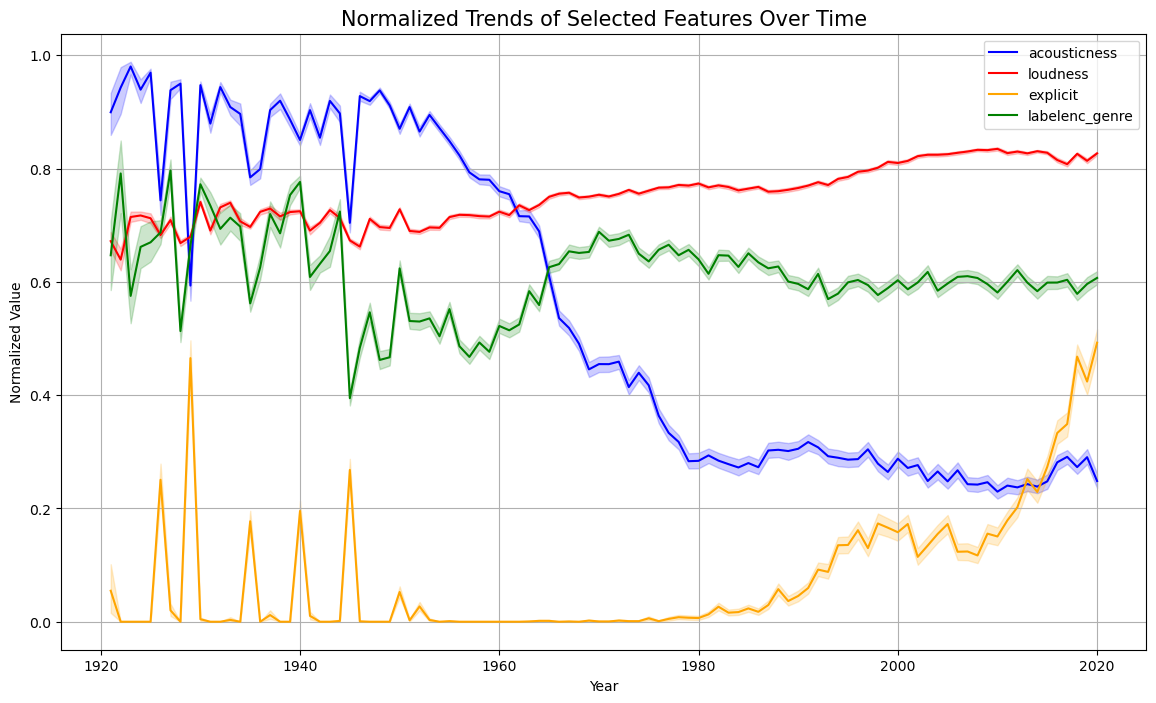

In [8]:
# Create a simple line plot for initial analysis
plt.figure(figsize=(14,8))
plt.title("Normalized Trends of Selected Features Over Time", fontdict={"fontsize": 15})

# Plot each feature separately
sns.lineplot(x='year', y="acousticness", data=df, label="acousticness", color="blue")
sns.lineplot(x='year', y="loudness", data=df, label="loudness", color="red")
sns.lineplot(x='year', y="explicit", data=df, label="explicit", color="orange")
sns.lineplot(x='year', y="labelenc_genre", data=df, label="labelenc_genre", color="green")

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### Normalization with aligned legend